In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

import import_ipynb
from environment import GameOfLifeEnv
# from Entropy import get_normalized_entropy
from scipy.special import binom

from utils import *

importing Jupyter notebook from utils.ipynb


In [2]:
def Q_Learning(Q, env, N_games=100, alpha=0.50, gamma=0.9, eps=0.1):
    
    for game in range(N_games):
        state = env.reset().copy()
#         print('inital state id: ', get_state_id(state),'\n inital state: \n', state)

        done = False
        i=0
        while not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)
            
            if state_id not in Q:
                Q[state_id] = np.zeros(env.grid_size ** 2)
            
            a = take_epsilon_greedy_action(Q[state_id], eps, all_actions)

            state_p, r, done = env.step(a)
            state_p_id = get_state_id(state_p)
            
            if state_p_id not in Q:
                Q[state_p_id] = np.zeros(env.grid_size ** 2)

            # update value function
            Q[state_id][a] += alpha * (r + gamma*np.max(Q[state_p_id]) - Q[state_id][a])
        
            # update states
            state = state_p
            i +=1
#         print(f'Game No {game} finished in {i} steps.')

#     return Q

In [3]:
def plot_after_avg(env, Q, trained_for):

#     max_gen_to_plot = env.max_generations
    max_gen_to_plot = 400
    eps = 0
    fig, ax = plt.subplots()

    all_rewards_Q = np.zeros(max_gen_to_plot)
    all_rewards_no_action = np.zeros_like(all_rewards_Q)
    all_rewards_r = np.zeros_like(all_rewards_Q)

    # actions from the Q function
    N_games = 50
    for i in range(N_games):
        state = env.reset()
        rewards_Q = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_Q)):
            if not done:
                all_actions = np.arange(len(state)**2)
                state_id = get_state_id(state)

                if state_id not in Q:
                    a = take_random_action(state)
                else:
                    a = take_epsilon_greedy_action(Q[state_id], eps, all_actions)

                state_p, r, done = env.step(a)
                state = state_p
                rewards_Q[j] = r
#         ax.plot(rewards_Q[:max_gen_to_plot], linewidth=0.5)
        all_rewards_Q = all_rewards_Q + rewards_Q
    avg_Q = all_rewards_Q / N_games

    # base evolution
    N_games = 50
    for i in range(N_games):
        env.reset()
        rewards_no_action = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_no_action)):
            if not done:
                _, r, done = env.step(None)
                rewards_no_action[j] = r

        all_rewards_no_action = all_rewards_no_action + rewards_no_action
    avg_no_action = all_rewards_no_action / N_games

    # taking random actions
    N_games = 50
    for i in range(N_games):
        state = env.reset()
        rewards_r = np.zeros(max_gen_to_plot)
        done = False
        for j in range(len(rewards_r)):
            if not done:
                a = take_random_action(state)
                _, r, done = env.step(a)
                rewards_r[j] = r
        all_rewards_r = all_rewards_r + rewards_r
    avg_random = all_rewards_r / N_games

    ax.set_title(f'Rewards averaged over 50 games after Q-learning for a random initial state')
    ax.plot(avg_no_action[:max_gen_to_plot], linewidth = 2, label='without agent')
    ax.plot(avg_random[:max_gen_to_plot], linewidth = 2, label='taking random actions')
    ax.plot(avg_Q[:max_gen_to_plot], linewidth = 2, label='using learned Q-function')

    plt.legend()
    ax.set_xlabel('generations')
    ax.set_ylabel('reward')
    name = f'figs/project/small_grid_{env.grid_size}x{env.grid_size}_{trained_for}_games_density{env.density}'
    name = name.replace('.', '_')
#     name='figs/5x5_noseed_shown-every'
    plt.savefig(name, transparent=True, bbox_inches='tight')

# Training with fixed/random initial state

In [14]:
env = GameOfLifeEnv(grid_size=6, density=0.5, max_generations=400)

In [5]:

Q_fixed_state = {}
total_games_trained_fixed = 0
alpha = 0.5
gamma = 1
eps = 0.1

675000
751819
918374


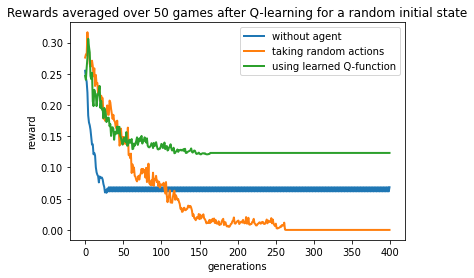

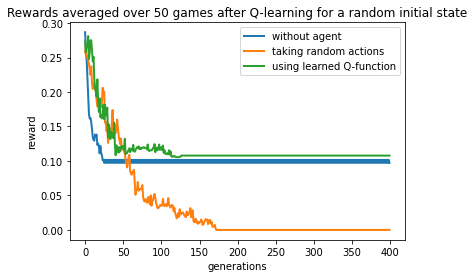

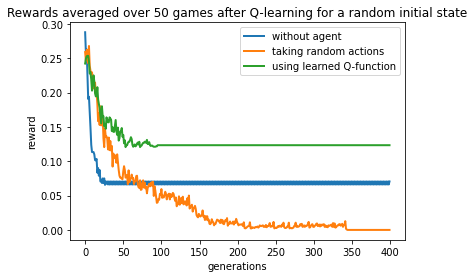

In [15]:
%matplotlib inline
##########################################################################
N_games = 500
eps = 0.5
Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
total_games_trained_fixed += N_games
print(len(Q_fixed_state))
plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)

##########################################################################
N_games = 2000
eps = 0.2
Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
total_games_trained_fixed += N_games
print(len(Q_fixed_state))
plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)

# ##########################################################################
N_games = 5500
eps = 0.1
# alpha = 0.3
Q_Learning(Q_fixed_state, env, N_games, alpha, gamma, eps)
total_games_trained_fixed += N_games
print(len(Q_fixed_state))
plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)


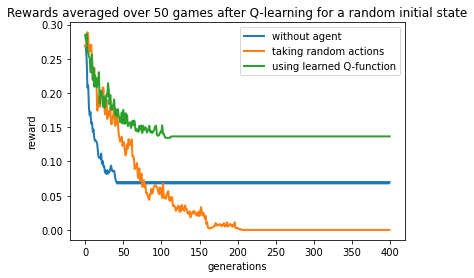

In [16]:
plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)


In [13]:
# see final state
env = GameOfLifeEnv(grid_size=6, density=0.5, max_generations=400, save_states=True)

# N_games = 1
# for i in range(N_games):
state = env.reset()
print(state)
done = False
for j in range(300):
    if not done:
        all_actions = np.arange(len(state)**2)
        state_id = get_state_id(state)
        if state_id not in Q_fixed_state:
                a = take_random_action(state)

        else:
            eps = 0
            a = take_epsilon_greedy_action(Q_fixed_state[state_id], eps, all_actions)

        state_p, r, done = env.step(a)
        state = state_p
#         print(j, state)

%matplotlib notebook
env.render()


[[0 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 1 1 0 1 1]
 [1 1 0 1 1 1]
 [1 1 1 1 1 1]
 [1 0 1 1 0 1]]


<IPython.core.display.Javascript object>

In [17]:
visited_states = 0
for e, i in enumerate(Q_fixed_state): 
    if np.sum(i) > 0:
        visited_states += 1
print(f'Trained for a total of {total_games_trained_fixed} games, visited states: {visited_states}/{len(Q_fixed_state)}')

Trained for a total of 22000 games, visited states: 918373/918374


In [102]:
env = GameOfLifeEnv(grid_size=6, density=0.5, max_generations=400)



def get_entropy(grid, subregion_size=3):
    #grid is a 2d np.array 
    grid_size = grid.shape[0]
    number_of_subregions = grid_size**2  # int(np.ceil(grid_size / subregion_size)**2)
    live_in_subregion = np.zeros(number_of_subregions)
    subregion_index = 0
    
# for each subregion get the number of live cells
    for row in range(0, grid_size, 1):
        for col in range(0, grid_size, 1):
            # count all live cells in this subregion
            for i in range(row, row + subregion_size, 1):
                for j in range(col, col + subregion_size, 1):
                    live_in_subregion[subregion_index] += grid[(i + grid_size) % grid_size][(j + grid_size) % grid_size]
               
            subregion_index +=1
        
    return np.sum(np.log(binom(subregion_size**2, live_in_subregion))) / grid_size**2

densities = np.arange(0, 1, 0.01)
average_entropies = np.zeros_like(densities)
N_average_over = 50
grid_size = 6
for i, d in enumerate(densities):
    s = 0 
    for j in range(N_average_over):
        env = GameOfLifeEnv(grid_size=grid_size, density=d)
        state = env.reset()
        s += get_entropy(state)
    average_entropies[i] = s / N_average_over

def get_random_system_entropy(density):
    densities = np.arange(0, 1, 0.01)
#     print(average_entropies[:10])
#   average_entropies = [0., 0.01525252, 0.02609767, 0.03613131, 0.0518619, 0.06535278, 0.07959899, 0.08570525, 0.10319554, 0.10968507, 0.12444196, 0.13584762, 0.14872067, 0.15572281, 0.16476713, 0.17493169, 0.18499817, 0.19559425, 0.20048626, 0.21102944, 0.22058581, 0.22994929, 0.23546127, 0.24372806, 0.24753459, 0.25510438, 0.2660314, 0.27270089, 0.27144202, 0.28346187, 0.2929966, 0.29662588, 0.30038607, 0.30188608, 0.30941611, 0.31146543, 0.31384183, 0.31990968, 0.32367102, 0.32255813, 0.32462908, 0.32771754, 0.33094136, 0.33593608, 0.3352076, 0.33467007, 0.3423281, 0.34062207, 0.33795877, 0.34097, 0.34067632, 0.33876563, 0.33807056, 0.3417815, 0.33965823, 0.33768922, 0.33475116, 0.33616758, 0.33053396, 0.32713019, 0.32684579, 0.32349513, 0.31950286, 0.32029873, 0.31344893, 0.31838919, 0.30579012, 0.3024099, 0.29486753, 0.29297575, 0.28640243, 0.28248875, 0.27493131, 0.27372419, 0.26574372, 0.25655671, 0.24575461, 0.23703445, 0.23773359, 0.23168023, 0.22576492, 0.2139171, 0.20333009, 0.19234418, 0.18232288, 0.17713799 , 0.16630712, 0.15811678, 0.14646726, 0.13677092, 0.13076081, 0.11277932, 0.10439938, 0.09069727, 0.0777831, 0.06510044, 0.0523559, 0.04022416, 0.02886697, 0.01253747]
    return np.interp(density, densities, average_entropies)
get_random_system_entropy(0.45)

def get_normalized_entropy(grid, subregion_size=3):
#     print(grid)
    density = np.sum(grid) / (grid.shape[0] * grid.shape[1])
    if density == 0:
        return 1
    entropy = get_entropy(grid, subregion_size)
    norm_entropy = entropy  / get_random_system_entropy(density)
#     print(f'density: {density},\n entropy {entropy}, а на случаен грин със същата плътност е {get_random_system_entropy(density)}')
    return norm_entropy



def plot_entropy(env, Q, trained_for):

#     max_gen_to_plot = env.max_generations
    max_gen_to_plot = 250
    eps = 0
    all_actions = np.arange(env.grid_size**2)
    fig, ax = plt.subplots()

    all_entropy_Q = np.zeros(max_gen_to_plot)
    all_entropy_no_action = np.zeros(max_gen_to_plot)
    all_entropy_r = np.zeros(max_gen_to_plot)

    # actions from the Q function
    N_games = 100
    for i in range(N_games):
        state = env.reset()
        entropy_Q = np.zeros(max_gen_to_plot)
        done = False
        for j in range(max_gen_to_plot):
            if not done:
                state_id = get_state_id(state)

                if state_id not in Q:
                    a = take_random_action(state)
                else:
                    a = take_epsilon_greedy_action(Q[state_id], eps, all_actions)
                    
                
                state, r, done = env.step(a)
            entropy_Q[j] = get_normalized_entropy(state)
#         ax.plot(entropy_Q[:max_gen_to_plot], linewidth=0.5)
        all_entropy_Q += entropy_Q
    avg_Q = all_entropy_Q/ N_games

    # base evolution
    N_games = 100
    for i in range(N_games):
        env.reset()
        entropy_no_action = np.zeros(max_gen_to_plot)
        done = False
        for j in range(max_gen_to_plot):
            if not done:
                state, r, done = env.step(None)
#             print(get_normalized_entropy(state))
            entropy_no_action[j] = get_normalized_entropy(state)

        all_entropy_no_action += entropy_no_action
    avg_no_action = all_entropy_no_action / N_games

    # taking random actions
    N_games = 100
    for i in range(N_games):
        state = env.reset()
        entropy_r = np.zeros(max_gen_to_plot)
        done = False
        for j in range(max_gen_to_plot):
            if not done:
                a = take_random_action(state)
                state, r, done = env.step(a)
            entropy_r[j] = get_normalized_entropy(state) 
        all_entropy_r += entropy_r
    avg_random = all_entropy_r / N_games

    ax.set_title(f'Normalized entropy averaged over 100 games')
    ax.plot(avg_no_action[:max_gen_to_plot], linewidth = 1.5, label='without agent')
    ax.plot(avg_random[:max_gen_to_plot], linewidth = 1.5, label='random actions')
    ax.plot(avg_Q[:max_gen_to_plot], linewidth = 1.5, label='learned Q-function')

    plt.legend(loc='center right')
    ax.set_xlabel('generations')
    ax.set_ylabel('reward')
    name = f'figs/project/ENTROPY_small_grid_{env.grid_size}x{env.grid_size}_{trained_for}_games_density{env.density}'
    name = name.replace('.', '_')
    name='figs/project/entropy_6_2'
    plt.savefig(name, transparent=True, bbox_inches='tight')

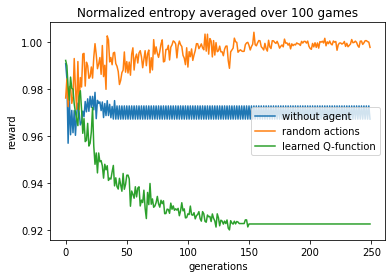

In [103]:
env = GameOfLifeEnv(grid_size=6, density=0.5, max_generations=400)

plot_entropy(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)
# plot_after_avg(env=env, Q=Q_fixed_state, trained_for=total_games_trained_fixed)


## Plotting the evolution of density after training for a fixed initial state

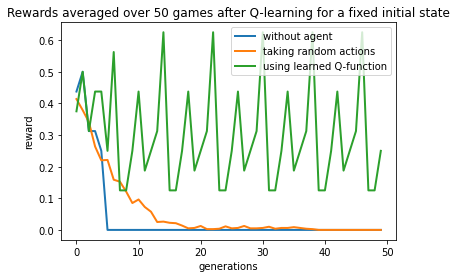

In [30]:
# %matplotlib inline

# Q_fixed = Q_fixed_state
# N_games = 50
# eps = 0
# fig, ax = plt.subplots()

# all_rewards_Q = np.zeros(200)
# all_rewards_no_action = np.zeros_like(all_rewards_Q)
# all_rewards_r = np.zeros_like(all_rewards_Q)

# # Averaging density for a fixed initial state taking actions from the Q function
# for i in range(N_games):
#     state = env.reset()
#     rewards_Q = np.zeros(200)
#     done = False
#     for j in range(len(rewards_Q)):
#         if not done:
#             all_actions = np.arange(len(state)**2)
#             state_id = get_state_id(state)

#             a = take_epsilon_greedy_action(Q_fixed[state_id, :], eps, all_actions)

#             state_p, r, done = env.step(a)
#             state = state_p
#             rewards_Q[j] = r
#         else: rewards_Q[j] = 0
#     all_rewards_Q = all_rewards_Q + rewards_Q
# #     ax.plot(rewards_Q[:50], linestyle = '--')
# avg_Q = all_rewards_Q / N_games

# # rewards for a fixed initial state, natural evolution
# state = env.reset()
# rewards_no_action = np.zeros(200)
# done = False
# for j in range(len(rewards_no_action)):
#     if not done:
#         state_p, r, done = env.step(None)
#         state = state_p
#         rewards_no_action[j] = r
#     else: rewards_no_action[j] = 0
# avg_no_action = rewards_no_action

# # # Averaging rewards for a fixed initial state taking random actions
# for i in range(N_games):
#     state = env.reset()
#     rewards_r = np.zeros(200)
#     done = False
#     for j in range(len(rewards_r)):
#         if not done:
#             a = take_random_action(state)
#             state_p, r, done = env.step(a)
#             state = state_p
#             rewards_r[j] = r
#         else: rewards_r[j] = 0
#     all_rewards_r = all_rewards_r + rewards_r
# avg_random = all_rewards_r / N_games

# ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a fixed initial state')
# ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
# ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
# ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

# plt.legend()
# ax.set_xlabel('generations')
# ax.set_ylabel('reward')
# plt.savefig('figs/v2_rewards_fixed_5000', transparent=True, bbox_inches='tight')

# Training with random initial state

In [32]:
# WARNING: RUN ONLY ONCE

env_no_seed = GameOfLifeEnv(grid_size=4, density=0.4)
Q = np.zeros((2**(env_no_seed.grid_size**2), env_no_seed.grid_size**2))
total_games_trained = 0
alpha = 0.5
gamma = 1.0
eps = 0.15

In [ ]:
# use this cell after restart

# Q = np.loadtxt('Q_function')

In [31]:
env_no_seed = GameOfLifeEnv(grid_size=4)
alpha = 0.5
gamma = 1.0
eps = 0.15

In [36]:
N_games = 1000
Q = Q_Learning(Q, env_no_seed, N_games, alpha, gamma, eps)
total_games_trained += N_games
np.savetxt('v2_Q_function', Q, newline="\n")

In [34]:
visited_states = 0
for e, i in enumerate(Q): 
    if np.sum(i) > 0:
        visited_states += 1
print(f'Trained for a total of {total_games_trained} games, visited states: {visited_states}/{len(Q)}')

Trained for a total of 1000 games, visited states: 2969/65536


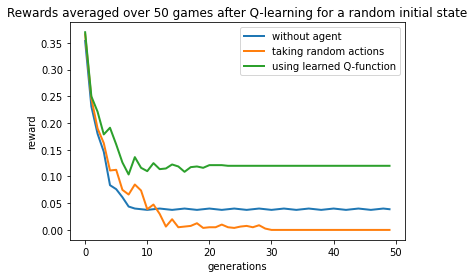

In [35]:
%matplotlib inline

Q_no_seed = Q
N_games = 50
eps = 0
fig, ax = plt.subplots()

all_rewards_Q = np.zeros(200)
all_rewards_no_action = np.zeros_like(all_rewards_Q)
all_rewards_r = np.zeros_like(all_rewards_Q)

# Averaging density for a random initial state taking actions from the Q function
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_Q = np.zeros(200)
    done = False
    for j in range(len(rewards_Q)):
        if not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)

            a = take_epsilon_greedy_action(Q_no_seed[state_id, :], eps, all_actions)

            state_p, r, done = env_no_seed.step(a)
            state = state_p
            rewards_Q[j] = r
        else: rewards_Q[j] = 0
    all_rewards_Q = all_rewards_Q + rewards_Q
#     ax.plot(rewards_Q[:50], linestyle = '--')
avg_Q = all_rewards_Q / N_games

# Averaging density for a random initial state, natural evolution
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_no_action = np.zeros(200)
    done = False
    for j in range(len(rewards_no_action)):
        if not done:
            state_p, r, done = env_no_seed.step(None)
            state = state_p
            rewards_no_action[j] = r
        else: rewards_no_action[j] = 0
    all_rewards_no_action = all_rewards_no_action + rewards_no_action
#     ax.plot(rewards_no_action[:50], linestyle = 'dotted')
avg_no_action = all_rewards_no_action / N_games

# # Averaging for a random initial state taking random actions
for i in range(N_games):
    state = env_no_seed.reset()
    rewards_r = np.zeros(200)
    done = False
    for j in range(len(rewards_r)):
        if not done:
            a = take_random_action(state)
            state_p, r, done = env_no_seed.step(a)
            state = state_p
            rewards_r[j] = r
        else: rewards_r[j] = 0
    all_rewards_r = all_rewards_r + rewards_r
avg_random = all_rewards_r / N_games

ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a random initial state')
ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

plt.legend()
ax.set_xlabel('generations')
ax.set_ylabel('reward')
plt.savefig('figs/v2_rewards_no_seed_1000', transparent=True, bbox_inches='tight')

In [10]:

env = GameOfLifeEnv(grid_size=4)
Qtest = np.zeros((2**(env.grid_size**2), env.grid_size**2))
total_games_trained_fixed = 0
alpha = 0.5
gamma = 1
eps = 0.1
N_games = 2000
Qtest = Q_Learning(Qtest, env, N_games, alpha, gamma, eps)


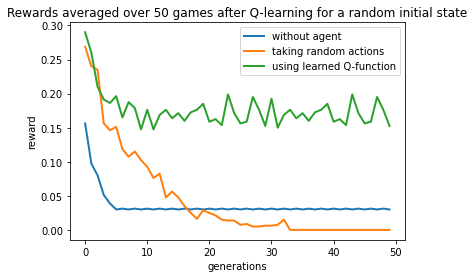

In [16]:

Q_no_seed = Qtest
N_games = 50
eps = 0
fig, ax = plt.subplots()

all_rewards_Q = np.zeros(200)
all_rewards_no_action = np.zeros_like(all_rewards_Q)
all_rewards_r = np.zeros_like(all_rewards_Q)

# Averaging density for a random initial state taking actions from the Q function
for i in range(N_games):
    state = env.reset()
    rewards_Q = np.zeros(200)
    done = False
    for j in range(len(rewards_Q)):
        if not done:
            all_actions = np.arange(len(state)**2)
            state_id = get_state_id(state)

            a = take_epsilon_greedy_action(Q_no_seed[state_id, :], eps, all_actions)
            state_p, r, done = env.step(a)
#             print(a, state_p)
            state = state_p
            rewards_Q[j] = r
    all_rewards_Q = all_rewards_Q + rewards_Q
#     ax.plot(rewards_Q[:50], linestyle = '--')
avg_Q = all_rewards_Q / N_games

# Averaging density for a random initial state, natural evolution
for i in range(N_games):
    state = env.reset()
    rewards_no_action = np.zeros(200)
    done = False
    for j in range(len(rewards_no_action)):
        if not done:
            state_p, r, done = env.step(None)
            state = state_p
            rewards_no_action[j] = r
    all_rewards_no_action = all_rewards_no_action + rewards_no_action
#     ax.plot(rewards_no_action[:50], linestyle = 'dotted')
avg_no_action = all_rewards_no_action / N_games

# # Averaging for a random initial state taking random actions
for i in range(N_games):
    state = env.reset()
    rewards_r = np.zeros(200)
    done = False
    for j in range(len(rewards_r)):
        if not done:
            a = take_random_action(state)
            state_p, r, done = env.step(a)
            state = state_p
            rewards_r[j] = r
    all_rewards_r = all_rewards_r + rewards_r
avg_random = all_rewards_r / N_games

ax.set_title(f'Rewards averaged over {N_games} games after Q-learning for a random initial state')
ax.plot(avg_no_action[:50], linewidth = 2, label='without agent')
ax.plot(avg_random[:50], linewidth = 2, label='taking random actions')
ax.plot(avg_Q[:50], linewidth = 2, label='using learned Q-function')

plt.legend()
ax.set_xlabel('generations')
ax.set_ylabel('reward')
plt.savefig('figs/v2_rewards_no_seed_2000', transparent=True, bbox_inches='tight')

In [47]:
print(env.seed)

42
